# 【課題1】練習のために特徴量の選択

In [1]:
#インポート
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import missingno as msno
pd.options.display.precision = 4
pd.options.display.float_format = '{:.3f}'.format

In [2]:
# 読み込み
train = pd.read_csv('train.csv',encoding='shift_jis')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# データからGrLivAreaとYearBuiltを抜き出す。
train = train[['YearBuilt','GrLivArea','SalePrice']]
train

,YearBuilt,GrLivArea,SalePrice
0,2003,1710,208500
1,1976,1262,181500
2,2001,1786,223500
3,1915,1717,140000
4,2000,2198,250000
5,1993,1362,143000
6,2004,1694,307000
7,1973,2090,200000
8,1931,1774,129900
9,1939,1077,118000


# 【課題2】回帰問題のパイプライン

まずは簡単にデータの分析、可視化

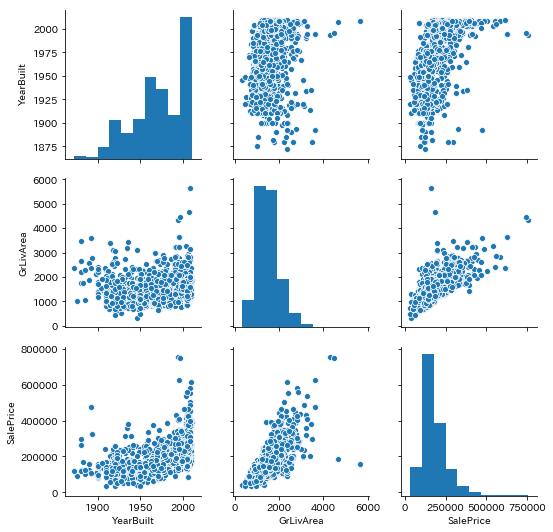

In [4]:
sns.pairplot(train)

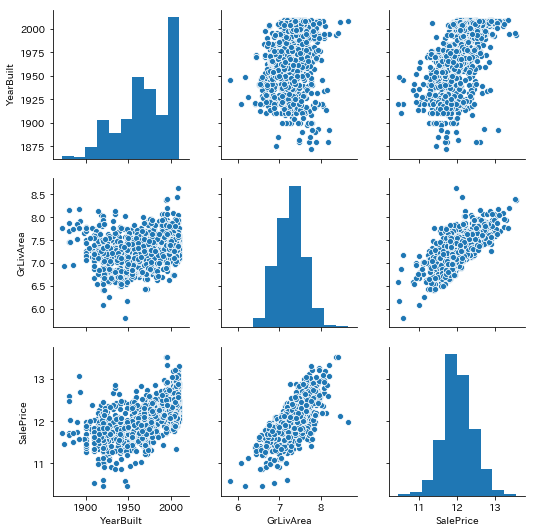

In [5]:
#GrAreaとSalePriceを対数変換する
train['GrLivArea'] = np.log(train.GrLivArea)
train['SalePrice'] = np.log(train.SalePrice)

#再度可視化
sns.pairplot(train);

対数変換後の変化

- はじめよりも、分布の偏りが減った。
- SalePriceに対して、GrLivAreaも線形の関係に近くなった。(GrLivAreaが大きくなるに連れてSalePriceのばらつきが大きくなる感じだったが、変換後はどの値に対してもばらつき具合は変わらない。三角形だった散布図が長方形の様な形となった。)
- 若干まだ外れ値も見られるがこのままにしておく

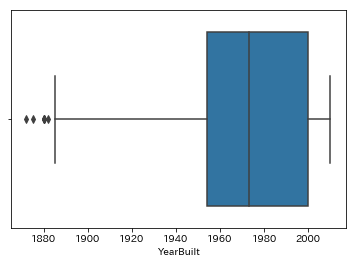

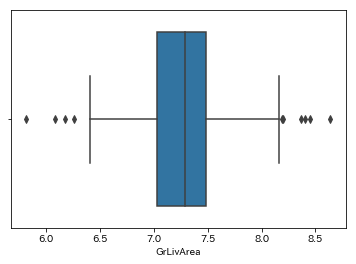

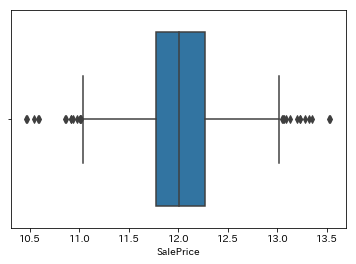

In [6]:
for i in range(len(train.columns)):
    sns.boxplot(train.iloc[:,i])
    plt.show();

/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


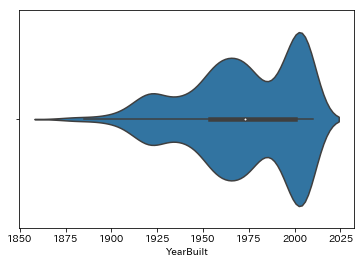

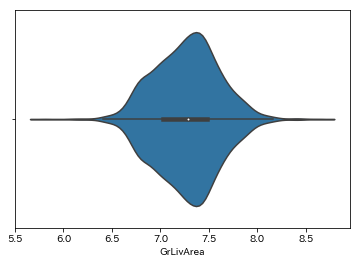

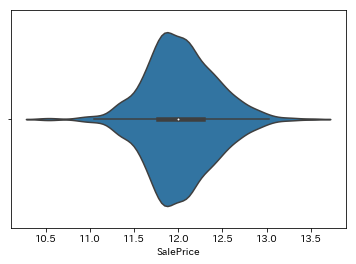

In [7]:
for i in range(len(train.columns)):
    sns.violinplot(train.iloc[:,i])
    plt.show();

In [8]:
#全体
train.describe()

,YearBuilt,GrLivArea,SalePrice
count,1460.000,1460.000,1460.000
mean,1971.268,7.268,12.024
std,30.203,0.334,0.399
min,1872.000,5.811,10.460
25%,1954.000,7.030,11.775
50%,1973.000,7.289,12.002
75%,2000.000,7.483,12.274
max,2010.000,8.638,13.534


In [9]:
#欠損値の確認
train.isnull().sum()

YearBuilt    0
GrLivArea    0
SalePrice    0
dtype: int64

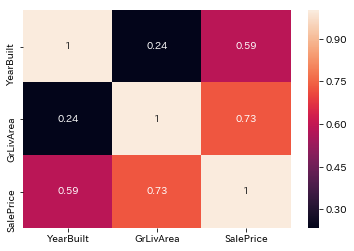

In [10]:
#相関関係の確認
corr_train = train.corr()
sns.heatmap(corr_train,annot=True);

- 欠損値はなし。
- SalePriceに対して、それぞれの変数が相関していて、更に変数同士の相関は少ないので、割と良い予測が出来そう。

### 前処理

In [11]:
#データセットを学習用、検証用と分ける
from sklearn.model_selection import train_test_split

#データをXとyにわける、そしてndarray型へ変更
X = train.drop('SalePrice',axis=1).values
y = train.SalePrice.values

#それぞれ学習用検証用に分割
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
len(X_train),len(X_test),len(y_train),len(y_test) #確認

(1095, 365, 1095, 365)

In [12]:
#標準化
#ライブラリをインポート
from sklearn.preprocessing import StandardScaler

#インスタンス化
scaler = StandardScaler()

#学習データにfit
scaler.fit(X_train)

#それぞれ変換する
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

### pipelineの作成

作成の前にpipelineに組み込む予定の流れを実行してみる。

①学習から予測まで

In [13]:
#学習
#インポート
from sklearn.linear_model import LinearRegression

#インスタンス化
lr = LinearRegression()

#学習
lr.fit(X_train_std,y_train)

#推定
y_pred_lr = lr.predict(X_test_std)

②評価から可視化まで

In [14]:
#インポート
from sklearn.metrics import mean_squared_error

#評価
mse_lr = mean_squared_error(y_test,y_pred_lr)
mse_lr

0.044279551654408625

残差をプロットする。

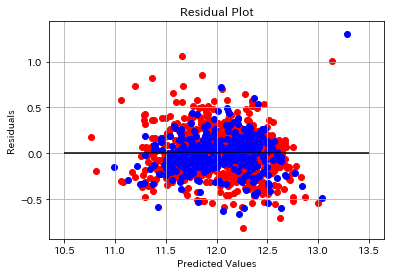

In [15]:
#X_trainも予測
y_trpred_lr = lr.predict(X_train_std)

#可視化
plt.scatter(y_trpred_lr,y_trpred_lr - y_train, color = 'red')      # 残差をプロット 
plt.scatter(y_pred_lr,y_pred_lr - y_test, color = 'blue')      # 残差をプロット 
plt.hlines(y = 0, xmin=10.5,xmax=13.5,color = 'black') # x軸に沿った直線をプロット
plt.title('Residual Plot')                                # 図のタイトル
plt.xlabel('Predicted Values')                            # x軸のラベル
plt.ylabel('Residuals')                                   # y軸のラベル
plt.grid()                                                # グリッド線を表示

plt.show()    

残差を確認すると、値が12付近では比較的下にブレる（低めに予測する）ことがある様に見える。
12から左右離れていくと、今度は上にブレる(高めに予測する)事が多い様にも見える

今の流れが出来る関数を作成

In [16]:
#インポート
from sklearn.pipeline import make_pipeline

#関数を作成
def pipeline(X,y,model,seed=0,test_size=0.25):
    """
    X,yとmodelクラスを入力する。
    train,testの分割、データの標準化、学習、予測、評価、可視化までを行う
    mseを返す

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 特徴量の数)
        データの説明変数
    y: ndarray, shape(n_samples,)
        データの目的変数
    model : object
        モデルのクラスを入れる
    seed : int
        テストデータへ分割する際のランダムシード
    test_size: float
        テストデータの割合(0〜１)
    """
    
    
    
    #学習用と検証用に分割
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,random_state=seed)
    
    #pipelineの作成、標準化とモデルを渡す
    pipe_model = make_pipeline(StandardScaler(),
                                                        model())
    
    #学習
    pipe_model.fit(X_train,y_train)

    #予測
    y_pred = pipe_model.predict(X_test)
    
    #評価
    mse = mean_squared_error(y_test,y_pred)
    print('{}のmse:{:.3f}'.format(model,mse))

    #可視化
    #X_trainも予測
    y_pred_tr = pipe_model.predict(X_train)

    #可視化
    plt.scatter(y_pred_tr,y_pred_tr - y_train, color = 'red')      # 残差をプロット 
    plt.scatter(y_pred,y_pred - y_test, color = 'blue')      # 残差をプロット 
    plt.hlines(y = 0, xmin=10.5,xmax=13.5,color = 'black') # x軸に沿った直線をプロット
    plt.title('Residual Plot「{}」'.format(model))                                # 図のタイトル
    plt.xlabel('Predicted Values')                            # x軸のラベル
    plt.ylabel('Residuals')                                   # y軸のラベル
    plt.grid()                                                # グリッド線を表示
    plt.show()
    return mse

<class 'sklearn.linear_model.base.LinearRegression'>のmse:0.044


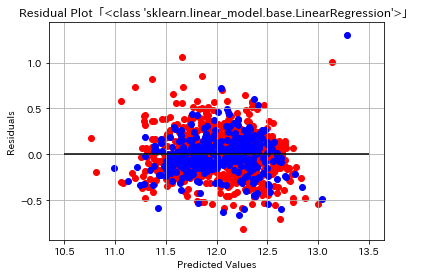

0.044279551654408625

In [17]:
#関数を使用してみる
mse_lr = pipeline(X,y,LinearRegression)
mse_lr

先程と同様の結果

# 【課題3】手法の比較

以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

In [18]:
#必要なモデルのインポート
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

<class 'sklearn.linear_model.base.LinearRegression'>のmse:0.044


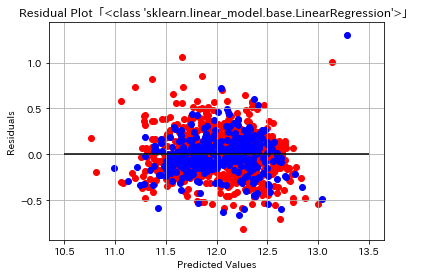

<class 'sklearn.svm.classes.SVR'>のmse:0.037


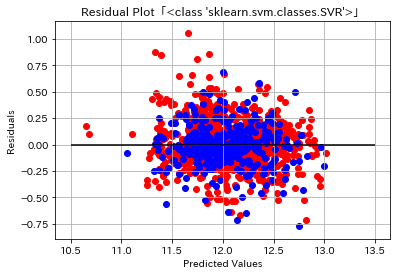

<class 'sklearn.tree.tree.DecisionTreeRegressor'>のmse:0.071


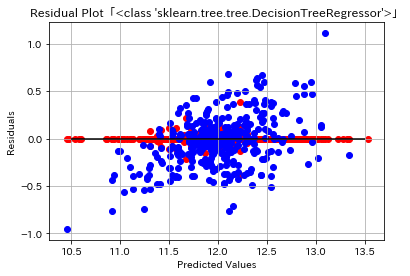

<class 'sklearn.ensemble.forest.RandomForestRegressor'>のmse:0.048


/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


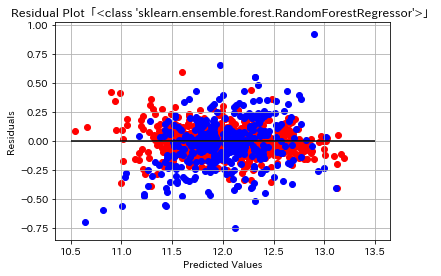

In [19]:
#モデルをリストに入れる
model = [LinearRegression, SVR,DecisionTreeRegressor,RandomForestRegressor]

#mseを入れる空のリストを作成
dict_mse = {}

#for文で先程のpipelineを回していく
for i in model:
    mse = pipeline(X,y,i)
    dict_mse['{}'.format(i)] = mse


In [20]:
dict_mse

{"<class 'sklearn.linear_model.base.LinearRegression'>": 0.044279551654408625,
 "<class 'sklearn.svm.classes.SVR'>": 0.03715226844948978,
 "<class 'sklearn.tree.tree.DecisionTreeRegressor'>": 0.07148892215585805,
 "<class 'sklearn.ensemble.forest.RandomForestRegressor'>": 0.0478772893205142}

考察
- 指標としてはサポートベクタマシンが一番成績良かった。
- SVRは残差もランダムに散らばっているように見える。
- 誤差がランダムに散らばっているということは、予測するyの大小に関わらず予測精度が一定ということ。
- 線形回帰もなんだかんだ悪くない成績
- 回帰木は明らかに過学習していて、テストデータの予測ができていない。
- ランダムフォレストは残差プロットはランダムに見えるが、線形回帰よりも少し成績が悪くなった。

# 【問題4】（アドバンス課題）各パラメータの意味

# 【問題5】（アドバンス課題）他の特徴量も使用しての学習